In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [8]:
# --- Load Excel file ---
df = pd.read_excel("fed_decision_data.xlsx")

In [9]:
df.head()


,meeting_date,direction,sp500_48h_before,sp500_24h_before,sp500_24h_after,sp500_48h_after
0,2020-01-29,HOLD,3243.629883,3276.239990,3283.659912,3225.520020
1,2020-03-03,HOLD,2954.219971,3090.229980,3130.120117,3023.939941
2,2020-03-04,CUT,3090.229980,3003.370117,3023.939941,2972.370117
3,2020-03-15,HOLD,2711.020020,2711.020020,2386.129883,2529.189941
4,2020-03-16,CUT,2711.020020,2711.020020,2529.189941,2398.100098


=== SUMMARY (each row = group × entry window × cost) ===


,model,n_trades,win_rate_%,avg_net_ret_%,median_net_ret_%,total_compounded_%,max_drawdown_%,start,end,enter,exit,txn_cost_bps,directions
0,CUT | enter_24h_exit_+1d | 5bps,6,83.33,-0.413,0.777,-2.70,-6.76,2020-03-04,2025-09-18,sp500_24h_before,sp500_24h_after,5,CUT
1,CUT | enter_48h_exit_+1d | 5bps,6,50.00,-1.322,-0.604,-7.90,-6.76,2020-03-04,2025-09-18,sp500_48h_before,sp500_24h_after,5,CUT
2,CUT | enter_24h_exit_+1d | 25bps,6,83.33,-0.613,0.577,-3.87,-6.96,2020-03-04,2025-09-18,sp500_24h_before,sp500_24h_after,25,CUT
3,CUT | enter_48h_exit_+1d | 25bps,6,50.00,-1.522,-0.804,-9.02,-7.36,2020-03-04,2025-09-18,sp500_48h_before,sp500_24h_after,25,CUT
4,BOTH | enter_24h_exit_+1d | 5bps,17,70.59,-0.483,0.369,-8.41,-14.42,2020-03-04,2025-09-18,sp500_24h_before,sp500_24h_after,5,"CUT,HIKE"
5,BOTH | enter_48h_exit_+1d | 5bps,17,47.06,-0.618,-0.846,-10.68,-10.64,2020-03-04,2025-09-18,sp500_48h_before,sp500_24h_after,5,"CUT,HIKE"
6,BOTH | enter_24h_exit_+1d | 25bps,17,70.59,-0.683,0.169,-11.49,-15.81,2020-03-04,2025-09-18,sp500_24h_before,sp500_24h_after,25,"CUT,HIKE"
7,BOTH | enter_48h_exit_+1d | 25bps,17,47.06,-0.818,-1.046,-13.69,-12.12,2020-03-04,2025-09-18,sp500_48h_before,sp500_24h_after,25,"CUT,HIKE"
8,HIKE | enter_24h_exit_+1d | 5bps,11,63.64,-0.522,0.289,-5.87,-10.34,2022-03-17,2023-07-27,sp500_24h_before,sp500_24h_after,5,HIKE
9,HIKE | enter_48h_exit_+1d | 5bps,11,45.45,-0.234,-0.846,-3.02,-10.38,2022-03-17,2023-07-27,sp500_48h_before,sp500_24h_after,5,HIKE



=== SAMPLE TRADE LOGS: first 2 keys ===

--- CUT | enter_24h_exit_+1d | 5bps ---


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
2,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.006349,1.006349
4,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.067571,0.938349
52,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.014503,0.951958
54,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.003257,0.955058
56,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.009495,0.964126
63,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.009198,0.972994



--- CUT | enter_24h_exit_+1d | 25bps ---


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
2,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.004349,1.004349
4,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.069571,0.934476
52,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.012503,0.946159
54,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.001257,0.947348
56,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.007495,0.954448
63,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.007198,0.961318


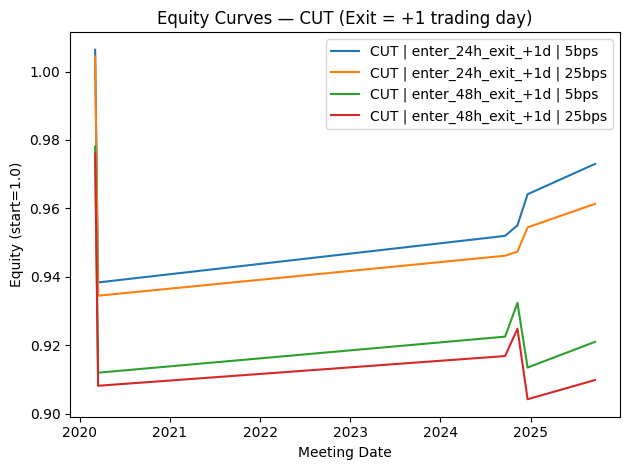

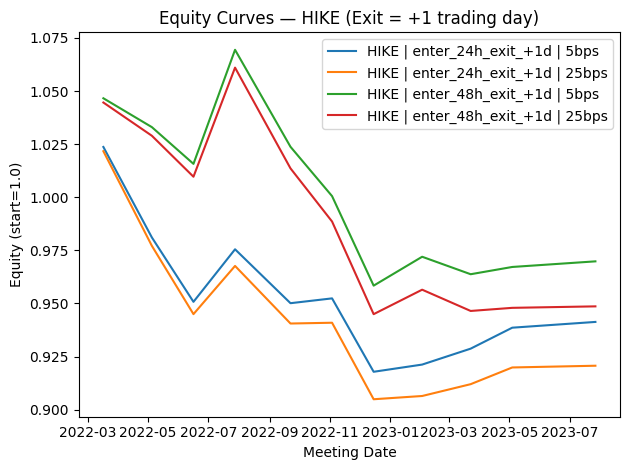

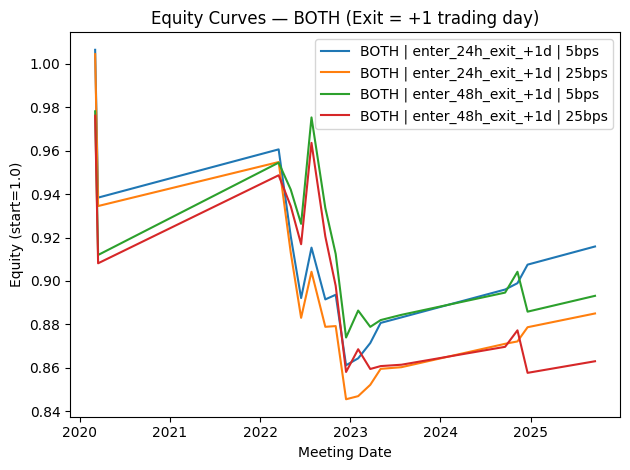

In [10]:
# =========================
# Fed Decision Event Strategy Backtest
# Hypothesis: Buy before the meeting, sell +1 trading day after.
# Variants: enter 48h-before vs 24h-before. Exit = 24h-after for both.
# Costs: test 5 bps and 25 bps round-trip.
# Directions: CUT, HIKE, BOTH (CUT+HIKE). No outlier exclusion, no risk controls.
# =========================

#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

# ---------- Load data ----------
#FILE = "fed_decision_data.xlsx"  # ensure this file is in your working directory
#df = pd.read_excel(FILE)

# basic cleaning
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

# sanity checks on expected columns
needed = [
    "meeting_date", "direction",
    "sp500_48h_before", "sp500_24h_before",
    "sp500_24h_after"
]
missing = [c for c in needed if c not in df.columns]
assert not missing, f"Missing columns: {missing}"

# ---------- helpers ----------
def max_drawdown(series: pd.Series) -> float:
    """Return max drawdown as a decimal (negative)."""
    rolling_max = series.cummax()
    drawdown = series / rolling_max - 1.0
    return float(drawdown.min())

def backtest_events(
    data: pd.DataFrame,
    directions=("CUT",),
    enter_field="sp500_24h_before",
    exit_field="sp500_24h_after",
    txn_cost_bps=5
):
    """
    Filters to selected directions, then computes per-trade net returns and equity curve.
    enter_field: price used to 'buy' before meeting (24h or 48h before).
    exit_field:  price used to 'sell' +1 trading day after meeting (24h after).
    txn_cost_bps: round-trip cost in basis points deducted from each trade's return.
    """
    d = data[data["direction"].isin(directions)].copy()
    if d.empty:
        return pd.DataFrame(), {}

    # raw return
    d["raw_ret"] = (d[exit_field] - d[enter_field]) / d[enter_field]
    # round-trip cost as decimal
    cost = txn_cost_bps / 10_000.0
    d["net_ret"] = d["raw_ret"] - cost

    # equity curve (reinvest per event)
    d["equity"] = (1.0 + d["net_ret"]).cumprod()

    # summary
    summary = {
        "n_trades": int(d.shape[0]),
        "win_rate_%": round((d["net_ret"] > 0).mean() * 100, 2),
        "avg_net_ret_%": round(d["net_ret"].mean() * 100, 3),
        "median_net_ret_%": round(d["net_ret"].median() * 100, 3),
        "total_compounded_%": round((d["equity"].iloc[-1] - 1.0) * 100, 2),
        "max_drawdown_%": round(max_drawdown(d["equity"]) * 100, 2),
        "start": d["meeting_date"].min().date().isoformat(),
        "end": d["meeting_date"].max().date().isoformat(),
        "enter": enter_field,
        "exit": exit_field,
        "txn_cost_bps": txn_cost_bps,
        "directions": ",".join(directions),
    }
    # neat trade log
    trades = d[["meeting_date", "direction", enter_field, exit_field, "raw_ret", "net_ret", "equity"]]
    return trades, summary

# ---------- experiment grid ----------
entry_variants = {
    # both exit at +1 trading day: sp500_24h_after
    "enter_24h_exit_+1d": dict(enter_field="sp500_24h_before", exit_field="sp500_24h_after"),
    "enter_48h_exit_+1d": dict(enter_field="sp500_48h_before", exit_field="sp500_24h_after"),
}
costs_bps = [5, 25]
direction_sets = {
    "CUT": ("CUT",),
    "HIKE": ("HIKE",),
    "BOTH": ("CUT", "HIKE"),
}

# ---------- run all and collect ----------
all_summaries = []
all_trades = {}

for dname, dset in direction_sets.items():
    for vname, vparams in entry_variants.items():
        for cost in costs_bps:
            key = f"{dname} | {vname} | {cost}bps"
            trades, summary = backtest_events(
                df, directions=dset, txn_cost_bps=cost, **vparams
            )
            all_trades[key] = trades
            if summary:
                row = dict(model=key, **summary)
                all_summaries.append(row)

# ---------- display summaries ----------
summary_df = pd.DataFrame(all_summaries).sort_values(["directions","txn_cost_bps","enter"]).reset_index(drop=True)
print("=== SUMMARY (each row = group × entry window × cost) ===")
display(summary_df)

# ---------- show trade logs (optional) ----------
print("\n=== SAMPLE TRADE LOGS: first 2 keys ===")
for i, (k, t) in enumerate(all_trades.items()):
    print(f"\n--- {k} ---")
    display(t)
    if i >= 1:  # show only first 2 by default (remove this break to show all)
        break

# ---------- plot equity curves by group ----------
for dname, dset in direction_sets.items():
    plt.figure()
    plotted = False
    for vname, vparams in entry_variants.items():
        for cost in costs_bps:
            key = f"{dname} | {vname} | {cost}bps"
            t = all_trades.get(key)
            if t is None or t.empty:
                continue
            plt.plot(t["meeting_date"], t["equity"], label=key)
            plotted = True
    if plotted:
        plt.title(f"Equity Curves — {dname} (Exit = +1 trading day)")
        plt.xlabel("Meeting Date")
        plt.ylabel("Equity (start=1.0)")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No trades for {dname} to plot.")

# ---------- (optional) save CSVs ----------
# summary_df.to_csv("fed_event_strategy_summary.csv", index=False)
# for k, t in all_trades.items():
#     t.to_csv(f"{k.replace(' | ','__').replace(' ','_')}.csv", index=False)


In [11]:
# basic cleaning
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

# sanity checks
needed = [
    "meeting_date", "direction",
    "sp500_48h_before", "sp500_24h_before", "sp500_24h_after"
]
missing = [c for c in needed if c not in df.columns]
assert not missing, f"Missing columns: {missing}"

# keep ONLY CUTS
df_cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)

# ---------- helpers ----------
def max_drawdown(series: pd.Series) -> float:
    """Return max drawdown as a decimal (negative)."""
    peak = series.cummax()
    dd = series / peak - 1.0
    return float(dd.min())

def backtest(
    data: pd.DataFrame,
    enter_field="sp500_24h_before",
    exit_field="sp500_24h_after",
    txn_cost_bps=5
):
    """
    Strategy on CUT meetings:
      - Buy at enter_field (24h_before or 48h_before)
      - Sell at exit_field (24h_after = +1 trading day)
      - Subtract round-trip txn_cost_bps from each trade's return
    """
    d = data.copy()
    if d.empty:
        return pd.DataFrame(), {}

    d["raw_ret"] = (d[exit_field] - d[enter_field]) / d[enter_field]
    cost = txn_cost_bps / 10_000.0
    d["net_ret"] = d["raw_ret"] - cost
    d["equity"] = (1.0 + d["net_ret"]).cumprod()

    summary = {
        "n_trades": int(d.shape[0]),
        "win_rate_%": round((d["net_ret"] > 0).mean() * 100, 2),
        "avg_net_ret_%": round(d["net_ret"].mean() * 100, 3),
        "median_net_ret_%": round(d["net_ret"].median() * 100, 3),
        "total_compounded_%": round((d["equity"].iloc[-1] - 1.0) * 100, 2),
        "max_drawdown_%": round(max_drawdown(d["equity"]) * 100, 2),
        "start": d["meeting_date"].min().date().isoformat(),
        "end": d["meeting_date"].max().date().isoformat(),
        "enter": enter_field,
        "exit": exit_field,
        "txn_cost_bps": txn_cost_bps,
    }

    trades = d[["meeting_date", "direction", enter_field, exit_field, "raw_ret", "net_ret", "equity"]]
    return trades, summary

# ---------- experiment grid (CUTS only) ----------
entry_variants = {
    "enter_24h_exit_+1d": dict(enter_field="sp500_24h_before", exit_field="sp500_24h_after"),
    "enter_48h_exit_+1d": dict(enter_field="sp500_48h_before", exit_field="sp500_24h_after"),
}
costs_bps = [5, 25]

# ---------- run all combos ----------
all_summaries = []
all_trades = {}

for vname, vparams in entry_variants.items():
    for cost in costs_bps:
        key = f"CUT | {vname} | {cost}bps"
        trades, summary = backtest(df_cuts, txn_cost_bps=cost, **vparams)
        all_trades[key] = trades
        if summary:
            all_summaries.append(dict(model=key, **summary))

# ---------- display summary ----------
summary_df = pd.DataFrame(all_summaries).sort_values(["txn_cost_bps","enter"]).reset_index(drop=True)
print("=== SUMMARY: CUTS ONLY (each row = entry window × cost) ===")
display(summary_df)

# ---------- show trade logs (all) ----------
for k, t in all_trades.items():
    print(f"\n--- Trades: {k} ---")
    display(t)

# ---------- plot equity curves ----------
plt.figure()
for k, t in all_trades.items():
    if t is None or t.empty:
        continue
    plt.plot(t["meeting_date"], t["equity"], label=k)
plt.title("Equity Curves — CUTS ONLY (Exit = +1 trading day)")
plt.xlabel("Meeting Date")
plt.ylabel("Equity (start=1.0)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- (optional) save CSVs ----------
# summary_df.to_csv("cuts_strategy_summary.csv", index=False)
# for k, t in all_trades.items():
#     t.to_csv(f"{k.replace(' | ','__').replace(' ','_')}.csv", index=False)







Sources

Ask ChatGPT


SyntaxError: invalid syntax (1525726092.py, line 117)

=== SUMMARY: CUTS ONLY (each row = entry window × cost) ===


,model,n_trades,win_rate_%,avg_net_ret_%,median_net_ret_%,total_compounded_%,max_drawdown_%,start,end,enter,exit,txn_cost_bps
0,CUT | enter_24h_exit_+1d | 5bps,6,83.33,-0.413,0.777,-2.70,-6.76,2020-03-04,2025-09-18,sp500_24h_before,sp500_24h_after,5
1,CUT | enter_48h_exit_+1d | 5bps,6,50.00,-1.322,-0.604,-7.90,-6.76,2020-03-04,2025-09-18,sp500_48h_before,sp500_24h_after,5
2,CUT | enter_24h_exit_+1d | 25bps,6,83.33,-0.613,0.577,-3.87,-6.96,2020-03-04,2025-09-18,sp500_24h_before,sp500_24h_after,25
3,CUT | enter_48h_exit_+1d | 25bps,6,50.00,-1.522,-0.804,-9.02,-7.36,2020-03-04,2025-09-18,sp500_48h_before,sp500_24h_after,25



--- Trades: CUT | enter_24h_exit_+1d | 5bps ---


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.006349,1.006349
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.067571,0.938349
2,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.014503,0.951958
3,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.003257,0.955058
4,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.009495,0.964126
5,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.009198,0.972994



--- Trades: CUT | enter_24h_exit_+1d | 25bps ---


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.004349,1.004349
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.069571,0.934476
2,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.012503,0.946159
3,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.001257,0.947348
4,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.007495,0.954448
5,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.007198,0.961318



--- Trades: CUT | enter_48h_exit_+1d | 5bps ---


,meeting_date,direction,sp500_48h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3090.229980,3023.939941,-0.021451,-0.021951,0.978049
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.067571,0.911961
2,2024-09-19,CUT,5634.580078,5702.549805,0.012063,0.011563,0.922506
3,2024-11-08,CUT,5929.040039,5995.540039,0.011216,0.010716,0.932392
4,2024-12-19,CUT,6050.609863,5930.850098,-0.019793,-0.020293,0.913471
5,2025-09-18,CUT,6606.759766,6664.359863,0.008718,0.008218,0.920978



--- Trades: CUT | enter_48h_exit_+1d | 25bps ---


,meeting_date,direction,sp500_48h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3090.229980,3023.939941,-0.021451,-0.023951,0.976049
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.069571,0.908144
2,2024-09-19,CUT,5634.580078,5702.549805,0.012063,0.009563,0.916829
3,2024-11-08,CUT,5929.040039,5995.540039,0.011216,0.008716,0.924820
4,2024-12-19,CUT,6050.609863,5930.850098,-0.019793,-0.022293,0.904203
5,2025-09-18,CUT,6606.759766,6664.359863,0.008718,0.006218,0.909825


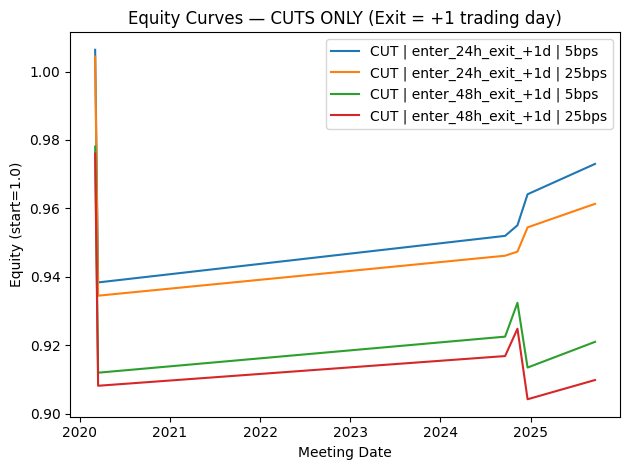

In [12]:
# basic cleaning
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

# sanity checks
needed = [
    "meeting_date", "direction",
    "sp500_48h_before", "sp500_24h_before", "sp500_24h_after"
]
missing = [c for c in needed if c not in df.columns]
assert not missing, f"Missing columns: {missing}"

# keep ONLY CUTS
df_cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)

# ---------- helpers ----------
def max_drawdown(series: pd.Series) -> float:
    """Return max drawdown as a decimal (negative)."""
    peak = series.cummax()
    dd = series / peak - 1.0
    return float(dd.min())

def backtest(
    data: pd.DataFrame,
    enter_field="sp500_24h_before",
    exit_field="sp500_24h_after",
    txn_cost_bps=5
):
    """
    Strategy on CUT meetings:
      - Buy at enter_field (24h_before or 48h_before)
      - Sell at exit_field (24h_after = +1 trading day)
      - Subtract round-trip txn_cost_bps from each trade's return
    """
    d = data.copy()
    if d.empty:
        return pd.DataFrame(), {}

    d["raw_ret"] = (d[exit_field] - d[enter_field]) / d[enter_field]
    cost = txn_cost_bps / 10_000.0
    d["net_ret"] = d["raw_ret"] - cost
    d["equity"] = (1.0 + d["net_ret"]).cumprod()

    summary = {
        "n_trades": int(d.shape[0]),
        "win_rate_%": round((d["net_ret"] > 0).mean() * 100, 2),
        "avg_net_ret_%": round(d["net_ret"].mean() * 100, 3),
        "median_net_ret_%": round(d["net_ret"].median() * 100, 3),
        "total_compounded_%": round((d["equity"].iloc[-1] - 1.0) * 100, 2),
        "max_drawdown_%": round(max_drawdown(d["equity"]) * 100, 2),
        "start": d["meeting_date"].min().date().isoformat(),
        "end": d["meeting_date"].max().date().isoformat(),
        "enter": enter_field,
        "exit": exit_field,
        "txn_cost_bps": txn_cost_bps,
    }

    trades = d[["meeting_date", "direction", enter_field, exit_field, "raw_ret", "net_ret", "equity"]]
    return trades, summary

# ---------- experiment grid (CUTS only) ----------
entry_variants = {
    "enter_24h_exit_+1d": dict(enter_field="sp500_24h_before", exit_field="sp500_24h_after"),
    "enter_48h_exit_+1d": dict(enter_field="sp500_48h_before", exit_field="sp500_24h_after"),
}
costs_bps = [5, 25]

# ---------- run all combos ----------
all_summaries = []
all_trades = {}

for vname, vparams in entry_variants.items():
    for cost in costs_bps:
        key = f"CUT | {vname} | {cost}bps"
        trades, summary = backtest(df_cuts, txn_cost_bps=cost, **vparams)
        all_trades[key] = trades
        if summary:
            all_summaries.append(dict(model=key, **summary))

# ---------- display summary ----------
summary_df = pd.DataFrame(all_summaries).sort_values(["txn_cost_bps","enter"]).reset_index(drop=True)
print("=== SUMMARY: CUTS ONLY (each row = entry window × cost) ===")
display(summary_df)

# ---------- show trade logs (all) ----------
for k, t in all_trades.items():
    print(f"\n--- Trades: {k} ---")
    display(t)

# ---------- plot equity curves ----------
plt.figure()
for k, t in all_trades.items():
    if t is None or t.empty:
        continue
    plt.plot(t["meeting_date"], t["equity"], label=k)
plt.title("Equity Curves — CUTS ONLY (Exit = +1 trading day)")
plt.xlabel("Meeting Date")
plt.ylabel("Equity (start=1.0)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- (optional) save CSVs ----------
# summary_df.to_csv("cuts_strategy_summary.csv", index=False)
# for k, t in all_trades.items():
#     t.to_csv(f"{k.replace(' | ','__').replace(' ','_')}.csv", index=False)





The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
=== SUMMARY — CUTS, 24h entry, 5 bps ===
   n_trades  win_rate_%  avg_net_ret_%  median_net_ret_%  total_compounded_%  \
0         6       83.33         -0.413             0.777                -2.7   

   max_drawdown_%       start         end             enter             exit  \
0           -6.76  2020-03-04  2025-09-18  sp500_24h_before  sp500_24h_after   

   txn_cost_bps  
0             5  

=== TRADE LOG ===


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.006349,1.006349
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.067571,0.938349
2,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.014503,0.951958
3,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.003257,0.955058
4,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.009495,0.964126
5,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.009198,0.972994


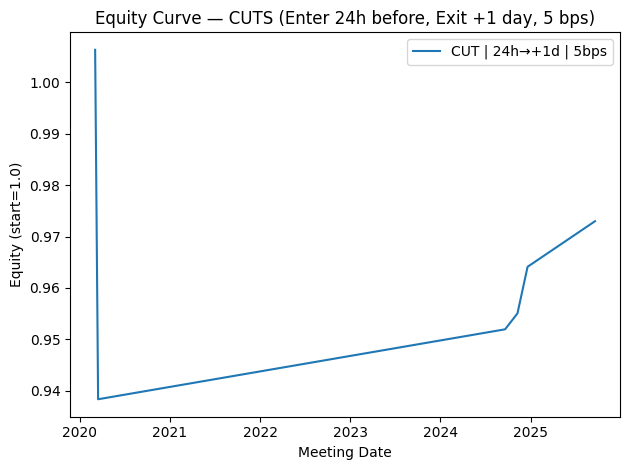

In [13]:
# =========================
# Fed Cuts Backtest — 24h Before, Exit +1 Day (5 bps)
# =========================

FILE = "fed_decision_data.xlsx"     # put the file in your working directory
ENTER = "sp500_24h_before"          # enter 24h before
EXIT  = "sp500_24h_after"           # exit +1 trading day after (24h after)
COST_BPS = 5                        # round-trip transaction cost

# ---------- Load & prep ----------
df = pd.read_excel(FILE)
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

needed = ["meeting_date","direction",ENTER,EXIT]
missing = [c for c in needed if c not in df.columns]
assert not missing, f"Missing columns: {missing}"

cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)
if cuts.empty:
    raise ValueError("No CUT events found in the dataset.")

# ---------- Returns & equity ----------
cuts["raw_ret"] = (cuts[EXIT] - cuts[ENTER]) / cuts[ENTER]
cost = COST_BPS / 10_000.0
cuts["net_ret"] = cuts["raw_ret"] - cost
cuts["equity"] = (1.0 + cuts["net_ret"]).cumprod()

# ---------- Metrics ----------
def max_drawdown(series: pd.Series) -> float:
    roll_max = series.cummax()
    dd = series / roll_max - 1.0
    return float(dd.min())

summary = {
    "n_trades": int(cuts.shape[0]),
    "win_rate_%": round((cuts["net_ret"] > 0).mean() * 100, 2),
    "avg_net_ret_%": round(cuts["net_ret"].mean() * 100, 3),
    "median_net_ret_%": round(cuts["net_ret"].median() * 100, 3),
    "total_compounded_%": round((cuts["equity"].iloc[-1] - 1.0) * 100, 2),
    "max_drawdown_%": round(max_drawdown(cuts["equity"]) * 100, 2),
    "start": cuts["meeting_date"].min().date().isoformat(),
    "end": cuts["meeting_date"].max().date().isoformat(),
    "enter": ENTER, "exit": EXIT, "txn_cost_bps": COST_BPS
}

print("=== SUMMARY — CUTS, 24h entry, 5 bps ===")
print(pd.DataFrame([summary]))

print("\n=== TRADE LOG ===")
try:
    from IPython.display import display
    display(cuts[["meeting_date","direction",ENTER,EXIT,"raw_ret","net_ret","equity"]])
except:
    print(cuts[["meeting_date","direction",ENTER,EXIT,"raw_ret","net_ret","equity"]].to_string(index=False))

# ---------- Plot ----------
plt.figure()
plt.plot(cuts["meeting_date"], cuts["equity"], label="CUT | 24h→+1d | 5bps")
plt.title("Equity Curve — CUTS (Enter 24h before, Exit +1 day, 5 bps)")
plt.xlabel("Meeting Date"); plt.ylabel("Equity (start=1.0)")
plt.legend(); plt.tight_layout(); plt.show()

# (optional) save
# cuts.to_csv("cuts_24h_5bps_trades.csv", index=False)
# pd.DataFrame([summary]).to_csv("cuts_24h_5bps_summary.csv", index=False)


=== SUMMARY — CUTS, 24h entry, 25 bps ===
   n_trades  win_rate_%  avg_net_ret_%  median_net_ret_%  total_compounded_%  \
0         6       83.33         -0.613             0.577               -3.87   

   max_drawdown_%       start         end             enter             exit  \
0           -6.96  2020-03-04  2025-09-18  sp500_24h_before  sp500_24h_after   

   txn_cost_bps  
0            25  

=== TRADE LOG ===


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.004349,1.004349
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.069571,0.934476
2,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.012503,0.946159
3,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.001257,0.947348
4,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.007495,0.954448
5,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.007198,0.961318


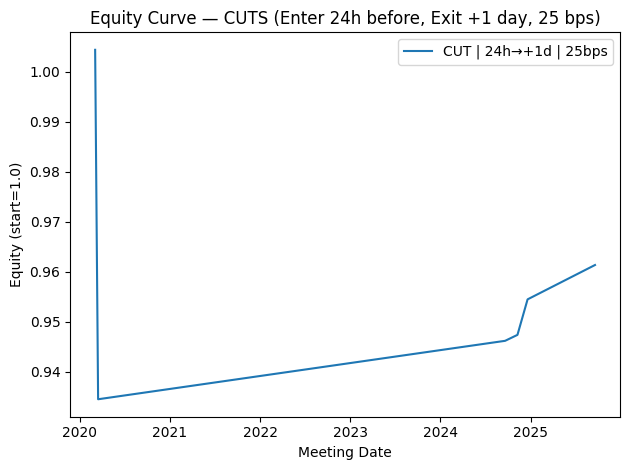

In [14]:
# =========================
# Fed Cuts Backtest — 24h Before, Exit +1 Day (25 bps)
# =========================

FILE = "fed_decision_data.xlsx"
ENTER = "sp500_24h_before"
EXIT  = "sp500_24h_after"
COST_BPS = 25                      # round-trip transaction cost

# ---------- Load & prep ----------
df = pd.read_excel(FILE)
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

needed = ["meeting_date","direction",ENTER,EXIT]
missing = [c for c in needed if c not in df.columns]
assert not missing, f"Missing columns: {missing}"

cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)
if cuts.empty:
    raise ValueError("No CUT events found in the dataset.")

# ---------- Returns & equity ----------
cuts["raw_ret"] = (cuts[EXIT] - cuts[ENTER]) / cuts[ENTER]
cost = COST_BPS / 10_000.0
cuts["net_ret"] = cuts["raw_ret"] - cost
cuts["equity"] = (1.0 + cuts["net_ret"]).cumprod()

# ---------- Metrics ----------
def max_drawdown(series: pd.Series) -> float:
    roll_max = series.cummax()
    dd = series / roll_max - 1.0
    return float(dd.min())

summary = {
    "n_trades": int(cuts.shape[0]),
    "win_rate_%": round((cuts["net_ret"] > 0).mean() * 100, 2),
    "avg_net_ret_%": round(cuts["net_ret"].mean() * 100, 3),
    "median_net_ret_%": round(cuts["net_ret"].median() * 100, 3),
    "total_compounded_%": round((cuts["equity"].iloc[-1] - 1.0) * 100, 2),
    "max_drawdown_%": round(max_drawdown(cuts["equity"]) * 100, 2),
    "start": cuts["meeting_date"].min().date().isoformat(),
    "end": cuts["meeting_date"].max().date().isoformat(),
    "enter": ENTER, "exit": EXIT, "txn_cost_bps": COST_BPS
}

print("=== SUMMARY — CUTS, 24h entry, 25 bps ===")
print(pd.DataFrame([summary]))

print("\n=== TRADE LOG ===")
try:
    from IPython.display import display
    display(cuts[["meeting_date","direction",ENTER,EXIT,"raw_ret","net_ret","equity"]])
except:
    print(cuts[["meeting_date","direction",ENTER,EXIT,"raw_ret","net_ret","equity"]].to_string(index=False))

# ---------- Plot ----------
plt.figure()
plt.plot(cuts["meeting_date"], cuts["equity"], label="CUT | 24h→+1d | 25bps")
plt.title("Equity Curve — CUTS (Enter 24h before, Exit +1 day, 25 bps)")
plt.xlabel("Meeting Date"); plt.ylabel("Equity (start=1.0)")
plt.legend(); plt.tight_layout(); plt.show()

# (optional) save
# cuts.to_csv("cuts_24h_25bps_trades.csv", index=False)
# pd.DataFrame([summary]).to_csv("cuts_24h_25bps_summary.csv", index=False)


=== COMPARISON: Fed CUTS (Enter 24h before, Exit +1 day) ===
File: fed_decision_data.xlsx | Enter: sp500_24h_before | Exit: sp500_24h_after



,cost_bps,n_trades,win_rate_%,avg_net_ret_%,median_net_ret_%,total_compounded_%,max_drawdown_%,start,end
0,5,6,83.33,-0.413,0.777,-2.70,-6.76,2020-03-04,2025-09-18
1,25,6,83.33,-0.613,0.577,-3.87,-6.96,2020-03-04,2025-09-18



--- TRADE LOG: 24h_before -> +1d | 5bps ---


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.006349,1.006349
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.067571,0.938349
2,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.014503,0.951958
3,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.003257,0.955058
4,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.009495,0.964126
5,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.009198,0.972994



--- TRADE LOG: 24h_before -> +1d | 25bps ---


,meeting_date,direction,sp500_24h_before,sp500_24h_after,raw_ret,net_ret,equity
0,2020-03-04,CUT,3003.370117,3023.939941,0.006849,0.004349,1.004349
1,2020-03-16,CUT,2711.020020,2529.189941,-0.067071,-0.069571,0.934476
2,2024-09-19,CUT,5618.259766,5702.549805,0.015003,0.012503,0.946159
3,2024-11-08,CUT,5973.100098,5995.540039,0.003757,0.001257,0.947348
4,2024-12-19,CUT,5872.160156,5930.850098,0.009995,0.007495,0.954448
5,2025-09-18,CUT,6600.350098,6664.359863,0.009698,0.007198,0.961318


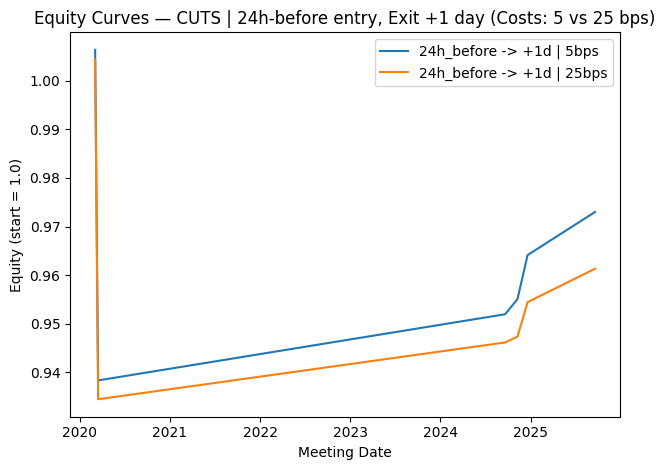

In [15]:
# =========================
# Compare Fed Cuts Strategy: 24h-before entry, exit +1 trading day
# Costs: 5 bps vs 25 bps — side-by-side summary + plot
# =========================


FILE = "fed_decision_data.xlsx"   # ensure this file is in your working directory
ENTER = "sp500_24h_before"        # enter 24h before the meeting
EXIT  = "sp500_24h_after"         # exit +1 trading day after (24h after)
COSTS = [5, 25]                   # round-trip cost in basis points to compare

# ---------- Load & prep ----------
df = pd.read_excel(FILE)
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

needed = ["meeting_date", "direction", ENTER, EXIT]
missing = [c for c in needed if c not in df.columns]
assert not missing, f"Missing columns: {missing}"

cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)
if cuts.empty:
    raise ValueError("No CUT events found in the dataset.")

# ---------- Helpers ----------
def max_drawdown(equity: pd.Series) -> float:
    """Return max drawdown as a decimal (negative)."""
    rollmax = equity.cummax()
    dd = equity / rollmax - 1.0
    return float(dd.min())

def run_variant(data: pd.DataFrame, cost_bps: int):
    """Compute per-trade returns and equity for a given cost."""
    d = data.copy()
    d["raw_ret"] = (d[EXIT] - d[ENTER]) / d[ENTER]
    cost = cost_bps / 10_000.0
    d["net_ret"] = d["raw_ret"] - cost
    d["equity"] = (1.0 + d["net_ret"]).cumprod()
    summary = {
        "cost_bps": cost_bps,
        "n_trades": int(d.shape[0]),
        "win_rate_%": round((d["net_ret"] > 0).mean() * 100, 2),
        "avg_net_ret_%": round(d["net_ret"].mean() * 100, 3),
        "median_net_ret_%": round(d["net_ret"].median() * 100, 3),
        "total_compounded_%": round((d["equity"].iloc[-1] - 1.0) * 100, 2),
        "max_drawdown_%": round(max_drawdown(d["equity"]) * 100, 2),
        "start": d["meeting_date"].min().date().isoformat(),
        "end": d["meeting_date"].max().date().isoformat(),
    }
    return d, summary

# ---------- Run both costs ----------
variant_outputs = {}
summaries = []

for c in COSTS:
    trades, summary = run_variant(cuts, cost_bps=c)
    key = f"24h_before -> +1d | {c}bps"
    variant_outputs[key] = trades
    summaries.append(summary)

# ---------- Comparison table ----------
summary_df = pd.DataFrame(summaries).sort_values("cost_bps").reset_index(drop=True)
print("=== COMPARISON: Fed CUTS (Enter 24h before, Exit +1 day) ===")
print(f"File: {FILE} | Enter: {ENTER} | Exit: {EXIT}\n")
display(summary_df)

# ---------- Show trade logs (optional: comment out if too long) ----------
for key, trades in variant_outputs.items():
    print(f"\n--- TRADE LOG: {key} ---")
    cols = ["meeting_date", "direction", ENTER, EXIT, "raw_ret", "net_ret", "equity"]
    try:
        from IPython.display import display
        display(trades[cols])
    except:
        print(trades[cols].to_string(index=False))

# ---------- Plot both equity curves ----------
plt.figure()
for key, trades in variant_outputs.items():
    plt.plot(trades["meeting_date"], trades["equity"], label=key)
plt.title("Equity Curves — CUTS | 24h-before entry, Exit +1 day (Costs: 5 vs 25 bps)")
plt.xlabel("Meeting Date"); plt.ylabel("Equity (start = 1.0)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- (optional) save outputs ----------
# summary_df.to_csv("comparison_cuts_24h_5bps_vs_25bps_summary.csv", index=False)
# for key, trades in variant_outputs.items():
#     fname = key.replace(" ", "_").replace("|", "__").replace("->", "to") + "_trades.csv"
#     trades.to_csv(fname, index=False)


In [16]:
# =========================
# Identify which Fed CUT events caused negative returns
# Strategy: Enter 24h before, Exit +1 day after
# Costs: test both 5 bps and 25 bps
# =========================

FILE = "fed_decision_data.xlsx"
ENTER = "sp500_24h_before"
EXIT  = "sp500_24h_after"
COSTS = [5, 25]   # test both cost scenarios

# Load and prep
df = pd.read_excel(FILE)
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)

def analyze_cuts(data, cost_bps):
    d = data.copy()
    d["raw_ret"] = (d[EXIT] - d[ENTER]) / d[ENTER]
    cost = cost_bps / 10_000.0
    d["net_ret"] = d["raw_ret"] - cost
    d["equity"] = (1.0 + d["net_ret"]).cumprod()
    d["cum_equity_change_%"] = (d["equity"] - 1.0) * 100
    return d

for c in COSTS:
    print(f"\n=== Fed CUT Strategy (24h→+1d, {c} bps) ===")
    trades = analyze_cuts(cuts, c)

    # Print worst 3 trades
    print("\n--- Worst 3 trades ---")
    print(trades.sort_values("net_ret").head(3)[["meeting_date","net_ret","raw_ret","cum_equity_change_%"]])

    # Print best 3 trades
    print("\n--- Best 3 trades ---")
    print(trades.sort_values("net_ret", ascending=False).head(3)[["meeting_date","net_ret","raw_ret","cum_equity_change_%"]])

    # Print all trades sorted (optional)
    # print(trades[["meeting_date","net_ret","cum_equity_change_%"]].sort_values("net_ret"))



=== Fed CUT Strategy (24h→+1d, 5 bps) ===

--- Worst 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
1   2020-03-16 -0.067571 -0.067071            -6.165081
3   2024-11-08  0.003257  0.003757            -4.494168
0   2020-03-04  0.006349  0.006849             0.634891

--- Best 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
2   2024-09-19  0.014503  0.015003            -4.804205
4   2024-12-19  0.009495  0.009995            -3.587378
5   2025-09-18  0.009198  0.009698            -2.700581

=== Fed CUT Strategy (24h→+1d, 25 bps) ===

--- Worst 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
1   2020-03-16 -0.069571 -0.067071            -6.552437
3   2024-11-08  0.001257  0.003757            -5.265157
0   2020-03-04  0.004349  0.006849             0.434891

--- Best 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
2   2024-09-19  0.012503  0.015003            -5.384074
4   2024-12-19  0.007495  0.009995 


=== Fed CUT Strategy (24h→+1d, 5 bps) ===

--- Worst 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
1   2020-03-16 -0.067571 -0.067071            -6.165081
3   2024-11-08  0.003257  0.003757            -4.494168
0   2020-03-04  0.006349  0.006849             0.634891

--- Best 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
2   2024-09-19  0.014503  0.015003            -4.804205
4   2024-12-19  0.009495  0.009995            -3.587378
5   2025-09-18  0.009198  0.009698            -2.700581


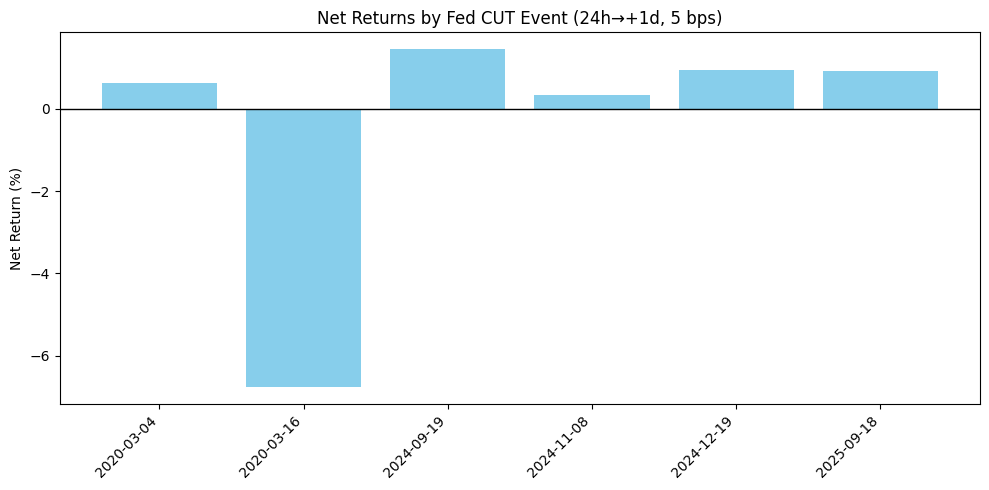


=== Fed CUT Strategy (24h→+1d, 25 bps) ===

--- Worst 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
1   2020-03-16 -0.069571 -0.067071            -6.552437
3   2024-11-08  0.001257  0.003757            -5.265157
0   2020-03-04  0.004349  0.006849             0.434891

--- Best 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
2   2024-09-19  0.012503  0.015003            -5.384074
4   2024-12-19  0.007495  0.009995            -4.555157
5   2025-09-18  0.007198  0.009698            -3.868151


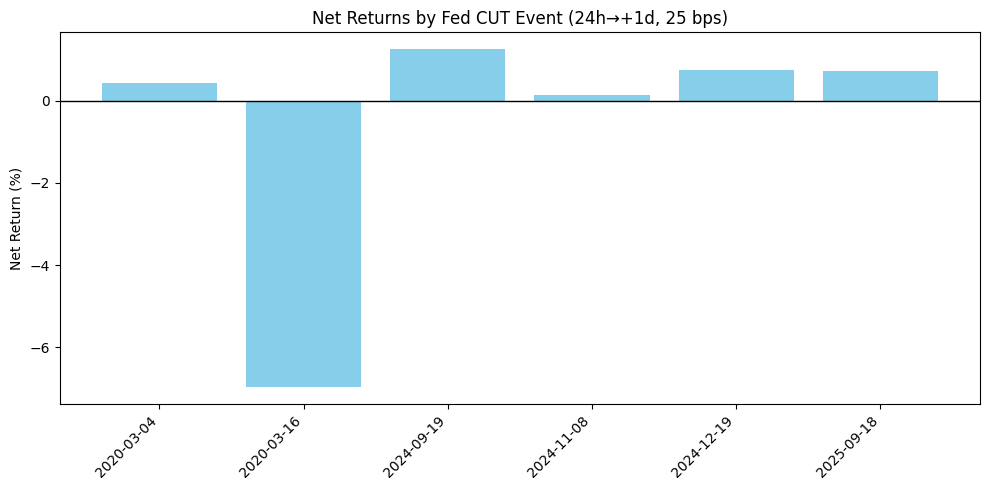

In [17]:
# =========================
# Analyze Fed CUT events: 24h-before entry, exit +1 day
# Costs: 5 bps and 25 bps
# Output: Best/Worst trades + Bar chart of returns
# =========================

FILE = "fed_decision_data.xlsx"
ENTER = "sp500_24h_before"
EXIT  = "sp500_24h_after"
COSTS = [5, 25]

# Load and prep
df = pd.read_excel(FILE)
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)

def analyze_cuts(data, cost_bps):
    d = data.copy()
    d["raw_ret"] = (d[EXIT] - d[ENTER]) / d[ENTER]
    cost = cost_bps / 10_000.0
    d["net_ret"] = d["raw_ret"] - cost
    d["equity"] = (1.0 + d["net_ret"]).cumprod()
    d["cum_equity_change_%"] = (d["equity"] - 1.0) * 100
    return d

for c in COSTS:
    print(f"\n=== Fed CUT Strategy (24h→+1d, {c} bps) ===")
    trades = analyze_cuts(cuts, c)

    # Worst 3 trades
    print("\n--- Worst 3 trades ---")
    print(trades.sort_values("net_ret").head(3)[["meeting_date","net_ret","raw_ret","cum_equity_change_%"]])

    # Best 3 trades
    print("\n--- Best 3 trades ---")
    print(trades.sort_values("net_ret", ascending=False).head(3)[["meeting_date","net_ret","raw_ret","cum_equity_change_%"]])

    # -------- Bar chart of all trades --------
    plt.figure(figsize=(10,5))
    plt.bar(trades["meeting_date"].dt.strftime("%Y-%m-%d"), trades["net_ret"]*100, color="skyblue")
    plt.axhline(0, color="black", linewidth=1)
    plt.title(f"Net Returns by Fed CUT Event (24h→+1d, {c} bps)")
    plt.ylabel("Net Return (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()



=== Fed CUT Strategy (Enter 24h before → Exit +1 day) | Cost: 5 bps ===
   n_trades  win_rate_%  avg_net_ret_%  median_net_ret_%  total_compounded_%  \
0         6       83.33         -0.413             0.777                -2.7   

   max_drawdown_%       start         end  
0           -6.76  2020-03-04  2025-09-18  

--- Worst 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
1   2020-03-16 -0.067571 -0.067071            -6.165081
3   2024-11-08  0.003257  0.003757            -4.494168
0   2020-03-04  0.006349  0.006849             0.634891

--- Best 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
2   2024-09-19  0.014503  0.015003            -4.804205
4   2024-12-19  0.009495  0.009995            -3.587378
5   2025-09-18  0.009198  0.009698            -2.700581


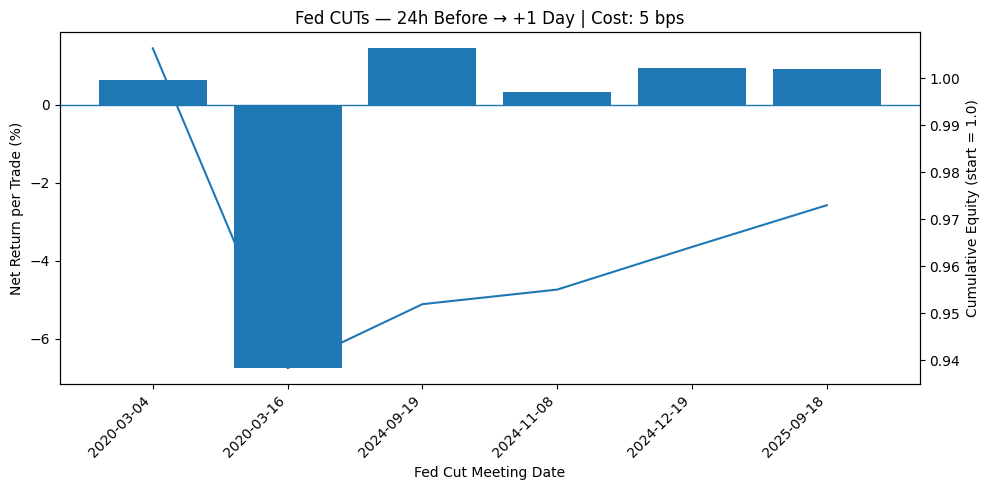


=== Fed CUT Strategy (Enter 24h before → Exit +1 day) | Cost: 25 bps ===
   n_trades  win_rate_%  avg_net_ret_%  median_net_ret_%  total_compounded_%  \
0         6       83.33         -0.613             0.577               -3.87   

   max_drawdown_%       start         end  
0           -6.96  2020-03-04  2025-09-18  

--- Worst 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
1   2020-03-16 -0.069571 -0.067071            -6.552437
3   2024-11-08  0.001257  0.003757            -5.265157
0   2020-03-04  0.004349  0.006849             0.434891

--- Best 3 trades ---
  meeting_date   net_ret   raw_ret  cum_equity_change_%
2   2024-09-19  0.012503  0.015003            -5.384074
4   2024-12-19  0.007495  0.009995            -4.555157
5   2025-09-18  0.007198  0.009698            -3.868151


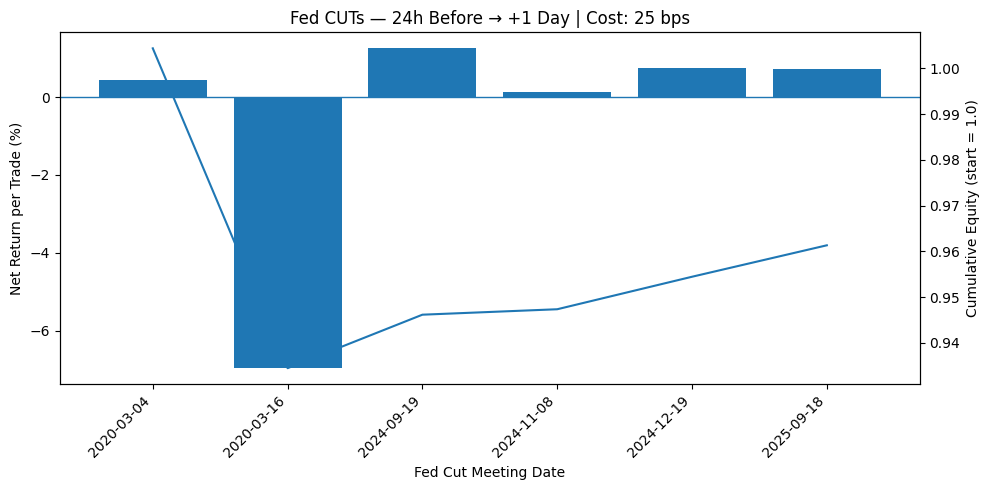

In [19]:
# ============================================
# Fed CUT Events — 24h-before entry, exit +1 day
# Costs compared: 5 bps and 25 bps
# Outputs: Worst/Best trades + Combined chart (bar returns + equity curve)
# ============================================


FILE = "fed_decision_data.xlsx"
ENTER = "sp500_24h_before"   # enter 24h before
EXIT  = "sp500_24h_after"    # exit +1 trading day (24h after)
COSTS = [5, 25]              # round-trip costs in basis points

# ---------- Load & prep ----------
df = pd.read_excel(FILE)
df["meeting_date"] = pd.to_datetime(df["meeting_date"])
df["direction"] = df["direction"].astype(str).str.upper()
df = df.sort_values("meeting_date").reset_index(drop=True)

cuts = df[df["direction"] == "CUT"].copy().reset_index(drop=True)
if cuts.empty:
    raise ValueError("No CUT events found in the dataset.")

needed = ["meeting_date", ENTER, EXIT]
missing = [c for c in needed if c not in cuts.columns]
assert not missing, f"Missing columns: {missing}"

def analyze_cuts(data: pd.DataFrame, cost_bps: int) -> pd.DataFrame:
    d = data.copy()
    d = d.sort_values("meeting_date").reset_index(drop=True)
    d["raw_ret"] = (d[EXIT] - d[ENTER]) / d[ENTER]
    cost = cost_bps / 10_000.0
    d["net_ret"] = d["raw_ret"] - cost
    d["equity"] = (1.0 + d["net_ret"]).cumprod()
    d["net_ret_pct"] = d["net_ret"] * 100.0
    d["cum_equity_change_%"] = (d["equity"] - 1.0) * 100.0
    return d

def max_drawdown(equity: pd.Series) -> float:
    rollmax = equity.cummax()
    dd = equity / rollmax - 1.0
    return float(dd.min())

for c in COSTS:
    trades = analyze_cuts(cuts, c)

    # --------- Text outputs ---------
    print(f"\n=== Fed CUT Strategy (Enter 24h before → Exit +1 day) | Cost: {c} bps ===")
    summary = {
        "n_trades": int(trades.shape[0]),
        "win_rate_%": round((trades["net_ret"] > 0).mean() * 100, 2),
        "avg_net_ret_%": round(trades["net_ret"].mean() * 100, 3),
        "median_net_ret_%": round(trades["net_ret"].median() * 100, 3),
        "total_compounded_%": round((trades["equity"].iloc[-1] - 1.0) * 100, 2),
        "max_drawdown_%": round(max_drawdown(trades["equity"]) * 100, 2),
        "start": trades["meeting_date"].min().date().isoformat(),
        "end": trades["meeting_date"].max().date().isoformat(),
    }
    print(pd.DataFrame([summary]))

    print("\n--- Worst 3 trades ---")
    print(trades.sort_values("net_ret").head(3)[["meeting_date","net_ret","raw_ret","cum_equity_change_%"]])

    print("\n--- Best 3 trades ---")
    print(trades.sort_values("net_ret", ascending=False).head(3)[["meeting_date","net_ret","raw_ret","cum_equity_change_%"]])

    # --------- Combined chart: bars (net returns %) + line (equity) ---------
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Bars: per-trade net return (%)
    x_labels = trades["meeting_date"].dt.strftime("%Y-%m-%d")
    x = range(len(trades))
    ax1.bar(x, trades["net_ret_pct"])
    ax1.axhline(0, linewidth=1)
    ax1.set_xlabel("Fed Cut Meeting Date")
    ax1.set_ylabel("Net Return per Trade (%)")

    # Line: cumulative equity (right axis)
    ax2 = ax1.twinx()
    ax2.plot(x, trades["equity"])
    ax2.set_ylabel("Cumulative Equity (start = 1.0)")

    # X ticks
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=45, ha="right")

    title = f"Fed CUTs — 24h Before → +1 Day | Cost: {c} bps"
    plt.title(title)
    plt.tight_layout()
    plt.show()
